# Combining Thermobar with VESIcal for Sat P at known T
- We show how to use various thermometers in Thermobar to calculate temperature, which can then be fed into saturation pressure calculations
- We also show how to combine thermometry (which is often sensitive to water content) with VESIcal calculate dissolved volatile calculations for insights into different H$_2$O contents at a range of crustal depths

!!!!! Please Note !!!!!!!

- VESIcal requires Thermoengine to run. If you do not have Thermoengine installed locally on your laptop, you will either need to instal it, or more simply to start with, run calculations using the ENKI server (http://enki-portal.org/). For more information, watch the following YouTube videos. 

## First, load the python things you might need

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Now, install VESIcal if you aren't running on the server
- Remove the # if you have Thermoengine installated locally

In [1]:
#!pip install VESIcal

## Now install Thermobar or upgrade

In [2]:
!pip install Thermobar
#!pip install --upgrade Thermobar

     |████████████████████████████████| 73.9 MB 98 kB/s s eta 0:00:01   |██▍                             | 5.6 MB 5.3 MB/s eta 0:00:13
  Using cached python_ternary-1.0.8-py3-none-any.whl (18 kB)


## Now import both Thermobar and VESIcal

In [3]:
import VESIcal as v
import Thermobar as pt
# This prints the versions
print('Thermobar version')
print(pt.__version__)
print('VESIcal version')
print(v.__version__)

/opt/conda/lib/python3.9/site-packages/thermoengine/calibrate.py:378: DeprecationWarning: invalid escape sequence \*
  [re.match(base+'[\*0-9]*', iname) is not None
/opt/conda/lib/python3.9/site-packages/thermoengine/calibrate.py:382: DeprecationWarning: invalid escape sequence \*
  [re.match(base+'\*', iname) is not None
/opt/conda/lib/python3.9/site-packages/thermoengine/equilibrate.py:4014: DeprecationWarning: invalid escape sequence \*
  """Sets the bulk composition of the system


Thermobar version
0.0.17
VESIcal version
1.0.2


## Example 1 - Simple integration of thermometry and saturation pressures
- Here, we calculating saturation pressures for olivine-hosted melt inclusions from Kilauea using temperatures from a specific thermometer

### Step 1: import the data
- Here, we import the data using Thermobars input structure, e.g., oxides for a liquid are followed by _Liq, and oxides for olivine are followed by _Ol

In [32]:
out=pt.import_excel('Ol_hosted_melt_inclusions.xlsx', sheet_name="Ol-Liq")

# This subdivdes outputs into a dataframe for all inputs (my_input), ols, and liqs
my_input=out['my_input']
myOls=out['Ols']
myLiquids1=out['Liqs']

## Lets check the outputs have loaded right
display(myOls.head())
display(myLiquids1.head())

,SiO2_Ol,TiO2_Ol,Al2O3_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,Cr2O3_Ol,NiO_Ol,Sample_ID_Ol
0,39.50335,0.0,0.02705,19.94265,0.29030,40.67610,0.24615,0.0,0.0,0.0,0.19135,0
1,39.26485,0.0,0.02400,21.20375,0.29335,40.16410,0.23895,0.0,0.0,0.0,0.18700,1
2,39.36000,0.0,0.03220,18.14420,0.25460,41.77670,0.23040,0.0,0.0,0.0,0.24260,2
3,39.27305,0.0,0.03355,18.17150,0.26455,41.93930,0.22475,0.0,0.0,0.0,0.24030,3
4,39.10665,0.0,0.02980,19.30270,0.27350,40.54345,0.25095,0.0,0.0,0.0,0.18230,4


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,51.423,3.229,13.392,11.396,0.149,6.191,9.859,2.636,0.675,0.0,0.337,0.533371,0.0,0.0,0.0,0.025772,LLD_LL1_80
1,51.375,3.343,13.202,11.876,0.134,6.001,9.729,2.602,0.635,0.0,0.364,0.546140,0.0,0.0,0.0,0.021389,LLD_LL1_103
2,50.793,2.550,13.523,11.337,0.179,7.432,10.594,2.303,0.429,0.0,0.378,0.500000,0.0,0.0,0.0,0.040292,LLE_LL4_19b
3,51.117,2.512,13.435,11.434,0.239,7.526,10.170,2.435,0.382,0.0,0.276,0.500000,0.0,0.0,0.0,0.022817,LLE_LL4_19c
4,51.649,2.758,13.747,11.338,0.282,6.020,10.397,2.435,0.496,0.0,0.347,0.500000,0.0,0.0,0.0,0.024655,LLE_LL4_33b


### Step 2: lets calculate the temperature using the Helz and Thornber (1987) thermometer which only uses liquid compositions.

In [33]:
T_HT87=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Helz1987_MgO")

### Step 3: lets calculate the saturation pressure using VESIcal at this temperature. 
- The function "convert_To_VESIcal" converts a liquid dataframe into the form needed for VESIcal, and adds a new column called "Temperature" in celcius based on an input you have given it in Kelvin from Thermobar
- It strips away the _Liq from each oxide used by Thermobar, and partitions into FeO and Fe2O3 depending user-entered Fe3Fet_Liq, as some solubility models are sensitive to redox.

In [34]:
df_HT87=pt.convert_to_vesical(liq_comps=myLiquids1, 
                              T1=T_HT87, Fe3Fet_Liq=0.15)
df_HT87.head()

,SiO2,TiO2,Al2O3,MnO,MgO,CaO,Na2O,K2O,Cr2O3,P2O5,H2O,NiO,CoO,CO2,Sample_ID,Temp,FeO,Fe2O3
0,51.423,3.229,13.392,0.149,6.191,9.859,2.636,0.675,0.0,0.337,0.533371,0.0,0.0,0.025772,LLD_LL1_80,1138.4391,9.68660,1.899333
1,51.375,3.343,13.202,0.134,6.001,9.729,2.602,0.635,0.0,0.364,0.546140,0.0,0.0,0.021389,LLD_LL1_103,1134.6201,10.09460,1.979333
2,50.793,2.550,13.523,0.179,7.432,10.594,2.303,0.429,0.0,0.378,0.500000,0.0,0.0,0.040292,LLE_LL4_19b,1163.3832,9.63645,1.889500
3,51.117,2.512,13.435,0.239,7.526,10.170,2.435,0.382,0.0,0.276,0.500000,0.0,0.0,0.022817,LLE_LL4_19c,1165.2726,9.71890,1.905666
4,51.649,2.758,13.747,0.282,6.020,10.397,2.435,0.496,0.0,0.347,0.500000,0.0,0.0,0.024655,LLE_LL4_33b,1135.0020,9.63730,1.889666


### Step 4: Now we do the final step to convert this dataframe into an object that we can enter into the calculation structures of VESIcal

In [35]:
VESIcal_out=v.BatchFile(filename=None, dataframe=df_HT87, label='Sample_ID')
VESIcal_out.data

,SiO2,TiO2,Al2O3,MnO,MgO,CaO,Na2O,K2O,Cr2O3,P2O5,H2O,NiO,CoO,CO2,Temp,FeO,Fe2O3
LLD_LL1_80,51.423,3.229,13.392,0.149,6.191,9.859,2.636,0.675,0.0,0.337,0.533371,0.0,0.0,0.025772,1138.4391,9.68660,1.899333
LLD_LL1_103,51.375,3.343,13.202,0.134,6.001,9.729,2.602,0.635,0.0,0.364,0.546140,0.0,0.0,0.021389,1134.6201,10.09460,1.979333
LLE_LL4_19b,50.793,2.550,13.523,0.179,7.432,10.594,2.303,0.429,0.0,0.378,0.500000,0.0,0.0,0.040292,1163.3832,9.63645,1.889500
LLE_LL4_19c,51.117,2.512,13.435,0.239,7.526,10.170,2.435,0.382,0.0,0.276,0.500000,0.0,0.0,0.022817,1165.2726,9.71890,1.905666
LLE_LL4_33b,51.649,2.758,13.747,0.282,6.020,10.397,2.435,0.496,0.0,0.347,0.500000,0.0,0.0,0.024655,1135.0020,9.63730,1.889666
LLE_LL4_30,51.918,2.789,13.903,0.285,6.143,10.726,2.583,0.476,0.0,0.348,0.500000,0.0,0.0,0.027924,1137.4743,9.64155,1.890500
LLE_LL5_40,51.076,3.198,13.492,0.176,6.204,9.981,2.657,0.668,0.0,0.351,2.000000,0.0,0.0,0.020969,1138.7004,9.75035,1.911833
LLE_LL5_50,50.907,3.550,13.156,0.184,5.507,9.505,2.972,0.688,0.0,0.375,4.000000,0.0,0.0,0.029344,1124.6907,10.55955,2.070500
LLE_LL5_52B,50.909,3.487,13.072,0.212,5.955,10.492,2.663,0.542,0.0,0.336,6.000000,0.0,0.0,0.025352,1133.6955,9.63475,1.889166


### Step 5: Final step - Calculate saturation pressure! 

In [36]:
# First lets use the default model MagmaSat
SatP_HT87=VESIcal_out.calculate_saturation_pressure(temperature="Temp")
SatP_HT87.head()


[====================] 100%  Working on sample LLE_LL5_52B                            


,SiO2,TiO2,Al2O3,MnO,MgO,CaO,Na2O,K2O,Cr2O3,P2O5,...,FeO,Fe2O3,Temp,SaturationP_bars_VESIcal,XH2O_fl_VESIcal,XCO2_fl_VESIcal,FluidMass_grams_VESIcal,FluidSystem_wt_VESIcal,Model,Warnings
LLD_LL1_80,51.423,3.229,13.392,0.149,6.191,9.859,2.636,0.675,0.0,0.337,...,9.68660,1.899333,1138.4391,420,0.132780,0.867220,0.000479,0.000479,MagmaSat,
LLD_LL1_103,51.375,3.343,13.202,0.134,6.001,9.729,2.602,0.635,0.0,0.364,...,10.09460,1.979333,1134.6201,360,0.160732,0.839268,0.000043,0.000043,MagmaSat,
LLE_LL4_19b,50.793,2.550,13.523,0.179,7.432,10.594,2.303,0.429,0.0,0.378,...,9.63645,1.889500,1163.3832,640,0.082606,0.917394,0.000442,0.000442,MagmaSat,
LLE_LL4_19c,51.117,2.512,13.435,0.239,7.526,10.170,2.435,0.382,0.0,0.276,...,9.71890,1.905666,1165.2726,370,0.132469,0.867531,0.000579,0.000579,MagmaSat,
LLE_LL4_33b,51.649,2.758,13.747,0.282,6.020,10.397,2.435,0.496,0.0,0.347,...,9.63730,1.889666,1135.0020,420,0.115698,0.884302,0.000302,0.000302,MagmaSat,


## Example 2 - Using a P-sensitive thermometer
- The first example was relatively simple, because the thermometer we choose wasn't sensitive to pressure
- Many more recent thermometers also have a pressure term. For example, the sugawara eq 3 olivine thermometer requires a pressure
- Thus, we show a way to iterate towards a solution
- First, we use the saturation pressure calculated above using the Helz and Thornber thermometer as a first guess. We then use the Sugawara thermometer as a P-sensitive thermometer to calculate a new temperature based on this pressure.

### Step 1 - Calc a new temp using a P-sensitive thermometer

In [37]:
# Here, we get temperature from the sat Ps calculated above, remember to divide by 1000 as Thermobar wants kbar not bar. 
T_Sug=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Sug2000_eq3_ol", 
                                 P=SatP_HT87['SaturationP_bars_VESIcal'].values/1000)

### Step 2 -  Lets add a new column called Temp_Sug and store our temp calculated (converted to values and to float)

In [38]:
VESIcal_out.data["Temp_Sug"] =T_Sug.values.astype(float)-273.15 # Remmeber to store as celcius
VESIcal_out.data

,SiO2,TiO2,Al2O3,MnO,MgO,CaO,Na2O,K2O,Cr2O3,P2O5,H2O,NiO,CoO,CO2,Temp,FeO,Fe2O3,Temp_Sug
LLD_LL1_80,51.423,3.229,13.392,0.149,6.191,9.859,2.636,0.675,0.0,0.337,0.533371,0.0,0.0,0.025772,1138.4391,9.68660,1.899333,1165.236659
LLD_LL1_103,51.375,3.343,13.202,0.134,6.001,9.729,2.602,0.635,0.0,0.364,0.546140,0.0,0.0,0.021389,1134.6201,10.09460,1.979333,1160.761311
LLE_LL4_19b,50.793,2.550,13.523,0.179,7.432,10.594,2.303,0.429,0.0,0.378,0.500000,0.0,0.0,0.040292,1163.3832,9.63645,1.889500,1193.196615
LLE_LL4_19c,51.117,2.512,13.435,0.239,7.526,10.170,2.435,0.382,0.0,0.276,0.500000,0.0,0.0,0.022817,1165.2726,9.71890,1.905666,1193.572407
LLE_LL4_33b,51.649,2.758,13.747,0.282,6.020,10.397,2.435,0.496,0.0,0.347,0.500000,0.0,0.0,0.024655,1135.0020,9.63730,1.889666,1161.052427
LLE_LL4_30,51.918,2.789,13.903,0.285,6.143,10.726,2.583,0.476,0.0,0.348,0.500000,0.0,0.0,0.027924,1137.4743,9.64155,1.890500,1162.594008
LLE_LL5_40,51.076,3.198,13.492,0.176,6.204,9.981,2.657,0.668,0.0,0.351,2.000000,0.0,0.0,0.020969,1138.7004,9.75035,1.911833,1167.718204
LLE_LL5_50,50.907,3.550,13.156,0.184,5.507,9.505,2.972,0.688,0.0,0.375,4.000000,0.0,0.0,0.029344,1124.6907,10.55955,2.070500,1158.426533
LLE_LL5_52B,50.909,3.487,13.072,0.212,5.955,10.492,2.663,0.542,0.0,0.336,6.000000,0.0,0.0,0.025352,1133.6955,9.63475,1.889166,1175.531868


### Step 3: Now we calculate saturation pressure using this new temperature

In [39]:
# Remember to subtract 273.15 if using direct outputs from thermobar (which use Kelvin, VESical wants celcius)
SatP_Sug1=VESIcal_out.calculate_saturation_pressure(temperature="Temp_Sug") 

[===============     ] 78%  Working on sample LLE_LL5_40                              = -1.53346e-13, iter = 42
duanDriver-2: t = 1466.35, p = 17000, z = 4.24779, v = 3.04638, delv = 0, dx = -3.78396e-14, iter = 43
duanH2ODriver(b): t = 1466.72, p = 16000, z = 2.67161, v = 2.03627, delv = 0, dx = -3.16876e-13, iter = 37
duanDriver-2: t = 1466.72, p = 9000, z = 2.92387, v = 3.96185, delv = 0, dx = -5.70047e-14, iter = 42
duanDriver-2: t = 1423.66, p = 8000, z = 2.73906, v = 4.05277, delv = 0, dx = -4.17471e-14, iter = 41
duanCO2Driver(b): t = 1411.59, p = 8000, z = 3.0659, v = 4.49792, delv = 0, dx = -2.62718e-14, iter = 44
duanDriver-2: t = 1411.59, p = 5000, z = 2.17282, v = 5.10032, delv = 0, dx = -1.1085e-13, iter = 38
duanDriver-2: t = 1438.42, p = 17000, z = 3.84712, v = 2.7065, delv = 0, dx = -5.36992e-14, iter = 40
duanCO2Driver(b): t = 1438.42, p = 14000, z = 4.36451, v = 3.72845, delv = 0, dx = -6.94267e-14, iter = 41
duanH2ODriver(b): t = 1408.15, p = 20000, z = 3.17487, v = 

### Example 3 - Using an olivine-Liquid thermometer which is sensitive to temperature and pressure
- Here, we use the solubility model of IaconoMarziano

### Step 1: Calculate temperature using a best guess of your pressure (e.g from knowledge of your system, 10 kbar here)

In [40]:
T_Put_10kbar=pt.calculate_ol_liq_temp(ol_comps=myOls, liq_comps=myLiquids1, equationT="T_Put2008_eq22", 
                                 P=10)


### Step 3: Append a new temperature onto the dataframe

In [41]:
# Now we append this as a third temperature. We need T_K_calc because this thermometer returns a dataframe
VESIcal_out.data["Temp_Put_10kbar"] =T_Put_10kbar['T_K_calc'].values.astype(float)-273.15 # Remmeber to store as celcius
VESIcal_out.data

,SiO2,TiO2,Al2O3,MnO,MgO,CaO,Na2O,K2O,Cr2O3,P2O5,H2O,NiO,CoO,CO2,Temp,FeO,Fe2O3,Temp_Sug,Temp_Put_10kbar
LLD_LL1_80,51.423,3.229,13.392,0.149,6.191,9.859,2.636,0.675,0.0,0.337,0.533371,0.0,0.0,0.025772,1138.4391,9.68660,1.899333,1165.236659,1195.679149
LLD_LL1_103,51.375,3.343,13.202,0.134,6.001,9.729,2.602,0.635,0.0,0.364,0.546140,0.0,0.0,0.021389,1134.6201,10.09460,1.979333,1160.761311,1190.987497
LLE_LL4_19b,50.793,2.550,13.523,0.179,7.432,10.594,2.303,0.429,0.0,0.378,0.500000,0.0,0.0,0.040292,1163.3832,9.63645,1.889500,1193.196615,1227.550886
LLE_LL4_19c,51.117,2.512,13.435,0.239,7.526,10.170,2.435,0.382,0.0,0.276,0.500000,0.0,0.0,0.022817,1165.2726,9.71890,1.905666,1193.572407,1231.062903
LLE_LL4_33b,51.649,2.758,13.747,0.282,6.020,10.397,2.435,0.496,0.0,0.347,0.500000,0.0,0.0,0.024655,1135.0020,9.63730,1.889666,1161.052427,1185.743714
LLE_LL4_30,51.918,2.789,13.903,0.285,6.143,10.726,2.583,0.476,0.0,0.348,0.500000,0.0,0.0,0.027924,1137.4743,9.64155,1.890500,1162.594008,1186.357851
LLE_LL5_40,51.076,3.198,13.492,0.176,6.204,9.981,2.657,0.668,0.0,0.351,2.000000,0.0,0.0,0.020969,1138.7004,9.75035,1.911833,1167.718204,1168.191324
LLE_LL5_50,50.907,3.550,13.156,0.184,5.507,9.505,2.972,0.688,0.0,0.375,4.000000,0.0,0.0,0.029344,1124.6907,10.55955,2.070500,1158.426533,1121.019824
LLE_LL5_52B,50.909,3.487,13.072,0.212,5.955,10.492,2.663,0.542,0.0,0.336,6.000000,0.0,0.0,0.025352,1133.6955,9.63475,1.889166,1175.531868,1088.724976


### Step 4: Calculate sat P using this temperature

In [42]:
# Now we calculate saturation pressure using this temperature
SatP_Put10kbar=VESIcal_out.calculate_saturation_pressure(temperature="Temp_Put_10kbar", model="IaconoMarziano") 

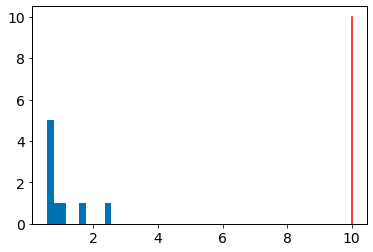

In [43]:
# We can see our guess of 10 kbar was way too high
plt.hist(SatP_Put10kbar['SaturationP_bars_VESIcal']/1000)
plt.plot([10, 10], [0, 10], '-r')

### Step 5: We could then repeat this process to basically "iterate" down to the right pressure

In [44]:
# Here we calculate a new temprature using these newly calculated pressures 
T_Put_PSat1=pt.calculate_ol_liq_temp(ol_comps=myOls, liq_comps=myLiquids1, equationT="T_Put2008_eq22", 
                                 P=SatP_Put10kbar['SaturationP_bars_VESIcal'].values/1000)

# Add another new column with this new temperature
VESIcal_out.data["Temp_Put_PSat1"] =T_Put_PSat1['T_K_calc'].values.astype(float)-273.15 # Remmeber to store as celcius

# Calculate saturation pressure again using this new temperature. 
SatP_Put_PSat1=VESIcal_out.calculate_saturation_pressure(temperature="Temp_Put_PSat1", model="IaconoMarziano") 

### Step 6 -  Lets compare the pressures calculated vs. the first step where we assumed 10 kbar.

Text(0, 0.5, 'Difference in Pressure \n for different T (bars)')

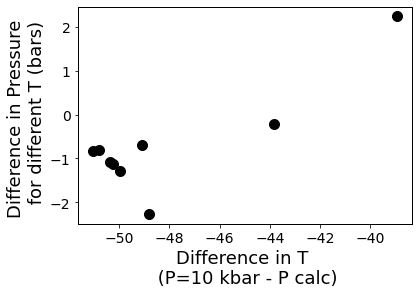

In [45]:
plt.plot(VESIcal_out.data['Temp_Put_PSat1'] - VESIcal_out.data['Temp_Put_10kbar'], 
    SatP_Put_PSat1['SaturationP_bars_VESIcal']-SatP_Put10kbar['SaturationP_bars_VESIcal'], 'ok') 
plt.xlabel('Difference in T \n (P=10 kbar - P calc)')
plt.ylabel('Difference in Pressure \n for different T (bars)')

## Example 4 - Lets generally compare thermometer models and how much difference they make

In [48]:
T_Put22_DMg=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Put2008_eq22_BeattDMg", P=2)

VESIcal_out.data["T_Put22_DMg"] =T_Put22_DMg.values.astype(float)-273.15 # Remmeber to store as celcius

SatP_T_Put22_DMg=VESIcal_out.calculate_saturation_pressure(temperature="T_Put22_DMg") 

Text(0, 0.5, 'Difference in Pressure: \n HT87 \n vs. P2008 eq22 (bars)')

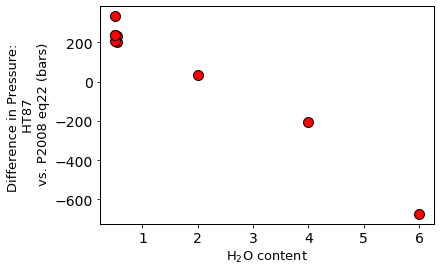

In [61]:
plt.plot(SatP_HT87['H2O'], 
    SatP_T_Put22_DMg['SaturationP_bars_VESIcal']-SatP_HT87['SaturationP_bars_VESIcal'], 'ok', mfc='red') 
plt.xlabel('H$_2$O content',  fontsize=13)
plt.ylabel('Difference in Pressure: \n HT87 \n vs. P2008 eq22 (bars)', fontsize=13)

### Summary 
- This notebook shows that VESIcal combined with Thermobar offers you lots of options. In reality, you will find that basaltic solubility models really aren't that sensitive to temperature, so in general there is no need to iterate tempeature and pressure (but you can confirm this yourself)
-  But, in water-rich arcs, choosing a temperature from say Helz and Thornber vs. a thermometer which has H2O included could make more of a difference. 